### Датасет "Титаник"

В этом ноутбуке потренируемся делать простейший разведочный анализ данных на примере датасета, содержащего информацию о пассажирах Титаника.

Цели ноутбука:
* освоить простые методы загрузки и обработки данных
* научиться проводить однофакторный и двухфакторный анализ данных
* потренироваться отвечать на вопросы по данным

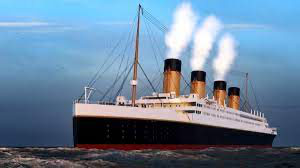

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Каждая строчка наборов данных содержит следующие поля:

- Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- Name — имя;

- Sex — пол;

- Age — возраст;

- SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- Parch — количество родителей, детей (в том числе приемных) на борту титаника;

- Ticket — номер билета;

- Fare — плата за проезд;

- Cabin — каюта;

- Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон);

- Survived - пассажир выжил или нет.

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/ML_econom_2022-2023/main/titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим на типы данных

In [ ]:
df.dtypes

In [ ]:
df.shape

Изучим характеристики столбцов

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

Подсчитаем количество значений в каждой категории

In [ ]:
df['Sex'].value_counts()

Изучим данные подробнее (фильтр по условию)

In [ ]:
df[df.Sex == 'unknown']

Посмотрим на корреляцию числовых столбцов друг с другом

In [ ]:
df.corr(method = 'pearson')

In [ ]:
df.corr(method='spearman') # наличие какой-то зависимости (не обязательно линейной) между столбцами

Выведем на экран список колонок и список индексов

In [ ]:
df.columns

In [ ]:
df.index

Посмотрим на части таблицы (один столбец, подмножество столбцов)

In [ ]:
Y = df["Survived"]
Y.head()

In [ ]:
df[["Survived", "Age"]].head()

Выделим матрицу объект-признак `X` и вектор с целевой переменной `y`

In [ ]:
X = df.drop("Survived", axis=1)

y = df['Survived']

In [ ]:
X.shape, y.shape

### Разведочный анализ данных

In [ ]:
set(df["Sex"])

In [ ]:
len(set(df["Name"]))

Изучим влияние различных факторов на целевую переменную

In [ ]:
df.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)

In [ ]:
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

### Обработка и преобразование данных

Закодируем столбец `Sex` (пол)

In [ ]:
df["Sex"] = df["Sex"].map({"male":1, "female":-1, "unknown":0})

Выделим фамилию из данных

In [ ]:
df["Surname"] = df["Name"].apply(lambda name: name.split(";")[0])

In [ ]:
df["Surname"].value_counts().head()

Группируем данные для получения дополнительной информации

In [ ]:
df.groupby("Sex")["Age"].mean()

In [ ]:
df.groupby(["Sex", "Pclass"]).agg(avg=('Age', 'mean'), avg_surv=('Survived', 'mean'))

Можем отвечать на вопросы по данным, например:
`сколько пассажиров Титаника имели возраст от 10 до 20 лет не включительно`?

In [ ]:
len(df.loc[(df["Age"]>10) & (df["Age"]<20)])

### Материалы для изучения


[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[10 Minutes To Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas CookBook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

[Подробные туториалы по Титанику на Kaggle](https://www.kaggle.com/competitions/titanic)

### Задания для самостоятельного выполнения:

1. Какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?

In [ ]:
# your code here

2. Сколько пассажиров выжило, а сколько - нет?

In [ ]:
#your code here

3. Создайте столбец "IsChild", который равен 1, если возраст меньше 20, и 0 иначе. Для пропущенных значений поведение функции может быть произвольным.

In [ ]:
# your code here

4. Какова доля выживших женщин из первого класса? А доля выживших мужчин из 3 класса?

In [ ]:
# your code here

5. Какова доля семей (будем считать семьей людей с одной фамилией), в которых минимальный возраст меньше 20?

In [ ]:
# your code here